# Outreach 2016

DATE: 2016-06-06

TIME: 22:08:00

STATUS: URGENT

CLASSIFICATION: TOP SECRET

MESSAGE BEGINS.

There is an exchange between two suspects at a motorway junction outside Heathrow Airport at 09:00 tomorrow morning. During this meeting, they will be transferring two parts of a secret weapon device. The transfer is secured by biometric technology, so we need the transfer to be made and apprehend the two parts together. The suspects are suspicious, and if they have any indication that we are watching them, the transfer will be aborted.

Our top operative lives in Southampton. We need them to arrive at this junction as close as possible to the time of the transfer so as not to arouse suspicion.

We’ve heard that you're the best upcoming talent in the leading data science department in Southampton. We need you to calculate what time they should leave. Take account of variability of traffic volume. It is better to be slightly late rather than slightly early, since we can still gain valuable intelligence from them as long as no suspicion is aroused.
You have 4 hours.

We were able to extract some information to assist in your estimation of an appropriate time, and have been able to generate some basic functions to make analysis of the data easier.  All you need to do is analyse the data.  Good luck!

MESSAGE ENDS.


## EXERCISE 0

In groups, brainstorm how we might solve this problem.

## EXERCISE 1
Please run the following code every time before starting the exercise.  This helps make sure that all the helper functions are in place.  You can run code by pressing `Crtl` + `Enter`, or `Shift` + `Enter` if you want to move onto the next line.

In [1]:
from magic import *

## EXERCISE 2a
Compute the amount of time it will take to get from Southampton to Heathrow using data from the first observed time (07:00).  Use the functions below to help you if you wish.

Never used Python before?  Don't worry, check out [Python crash course](python_intro.ipynb) before you get started.

Experienced programmer?  You might find [outreach_hard.ipynb](outreach_hard.ipynb) more interesting

In [2]:
from magic import *
# Run this to see the data you have
leaving_time = '07:00'
data = get_data(1, 2013, 1, leaving_time)[0]

# Your code goes here!
### TODO: ANSWER, remove it!
total_time = 0
for d in data:    
    print("dict: %d, %s" % (d, str(data[d])))

    total_time += data[d]

print("Arrival time: %s" % get_arrival_time(leaving_time, total_time))
### END ANSWER


dict: 1, 190.32
dict: 2, 158.85
dict: 3, 223.14
dict: 4, 93.21
dict: 5, 99.45
dict: 6, 1342.67
dict: 7, 87.55
dict: 8, 264.51
dict: 9, 257.65
dict: 10, 387.22
dict: 11, 310.45
dict: 12, 623.01
dict: 13, 716.88
Arrival time: 08:19:14


## EXERCISE 2b: 
Generalise your result to leaving every 15 minutes between 05:00 to 09:00.  You may use the function below to help if you would like, or feel free to create your own if it will be easier!

In [3]:
# Copy your answer from EXERCISE 1a here, and make it into a function called "calculate_arrivals".  
# Use that to complete this exercise

def calculate_arrivals(year, month, leaving_time):
    data = get_data(1, '%d' % year, '%d' % month, leaving_time)[0]
    # print("data: %s" % str(data))

    total_time = 0
    for d in data:
        # print("dict: %d, %s" % (d, str(data[d])))
        total_time += data[d]

    return get_arrival_time(leaving_time, total_time)


### ANSWER
leaving_time = '05:00'
# TODO: Get a better loop
for lt in range(0, 17):
    arr = calculate_arrivals(2013, 1, leaving_time)
    #print("leaving: %s arriving: %s" % (leaving_time, arr))
    leaving_time = get_next_time(leaving_time)

### END ANSWER

## EXERCISE 2c: 
Generalise this to all days in the month, and all months.  Return the results as a dictionary in the format `{leaving_time: [list of arrival times]}`, e.g. `{'08:15': ['08:57:04', '09:16:28', ...]}`

In [4]:
### ANSWER
def loop_calculate_arrivals():
    arrivals_dict = {}

    # TODO: Get a better loop
    for i in range(2012, 2015):
        for j in range(1, 12):
            leaving_time = '05:00'
            for lt in range(0, 17):
                arr = calculate_arrivals(i, j, leaving_time)

                if not leaving_time in arrivals_dict:
                    arrivals_dict[leaving_time] = []
                arrivals_dict[leaving_time].append(arr)

                leaving_time = get_next_time(leaving_time)
    return arrivals_dict

arrivals_dict = loop_calculate_arrivals()

for ad in arrivals_dict:
    # print("Leaving at: %s\nArriving at: %s" % (ad, str(arrivals_dict[ad])))
    pass

    
### END ANSWER

## EXERCISE 3

We now have a considerable amount of data, but it doesn't make any sense!  Now we need to make it make sense.  We have somewhere around 500 data points, so very cumbersome to calculate anything by hand.  Luckily, Python is good at automating these things, and has got libraries where clever people have already implemented common descriptive statistics methods far better than I could ever hope to...

The technique we are going to use to solve this is linear regression.  


## EXERCISE 3a
First of all, we're going to get the mean arrival time for each leaving time.  Dealing with time data can be difficult, so we're going to convert the arrival time into the amount of seconds since midnight.  Use the function `get_time_in_seconds(time_str)`, which performs this calculation for you and `time_str` is a time in the format HH:MM:SS.

Return a dictionary of each leaving time (as a string) with the mean arrival time (in seconds), e.g., `{'07:00': 25200}`.  To do this, we will use the `mean` function from the numpy library.  This means we will need to import `numpy`, and also use a special `numpy` data structure the array.  

An array can be created from a list, by running `np.asarray`, as in the example below

In [5]:
import numpy as np
# Create an array object 
listy = [1, 2, 3, 4]
array_obj = np.asarray(listy)
print(listy, type(listy))
print(array_obj, type(array_obj))

# Get the mean of the array object:
np.mean(array_obj)

[1, 2, 3, 4] <class 'list'>
[1 2 3 4] <class 'numpy.ndarray'>


2.5

In [6]:
# Your code goes here!  
# TODO: This is the answer - make sure we take it out!
obj = loop_calculate_arrivals()
means_output = []
cats_output = []
for k in obj.keys():
    new_list = []
    #cats_output.append(datetime.datetime.strptime(k, '%H:%S').timestamp())
    cats_output.append(get_time_in_seconds(k))
    #print(obj[k])
    for li in obj[k]:        
        new_list.append(get_time_in_seconds(li))
    #print(new_list)
    mean = np.mean(np.asarray(new_list))
    means_output.append(mean)
print(cats_output)
print(means_output)

[30600, 32400, 26100, 27900, 18900, 23400, 28800, 21600, 27000, 31500, 19800, 29700, 22500, 18000, 25200, 24300, 20700]
[33995.36363636364, 35437.727272727272, 30206.303030303032, 31896.909090909092, 21551.575757575756, 26724.242424242424, 32593.39393939394, 24357.21212121212, 31099.909090909092, 34658.393939393936, 22457.424242424244, 33329.515151515152, 25482.303030303032, 20666.78787878788, 29156.39393939394, 28009.78787878788, 23378.60606060606]


## EXERCISE 3b

Now we have the mean, we are going to visualise our output.  To do this, we will be using the Python library `pyplot`, which is part of `matplotlib`.  We want to create a scatterplot which has the leaving time as the predictor variable, and the arrival time as the response variable.  

Use the `plt.scatter` function to create a scatterplot to visualise our times.  This function takes as its first two parameters:

* A list of values for the X axis
* A list of values for tye Y axis

Use the values obtained from Exercise 3a to do this.

In [7]:
# Do the necessary imports
import matplotlib.pyplot as plt
%matplotlib inline

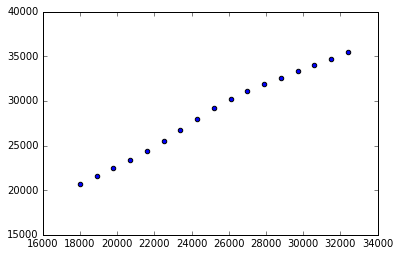

In [8]:


#plt.bar(np.array(cats_output), np.array(means_output))

plt.scatter(cats_output, means_output)


## EXERCISE 3c

Having done this, we now need to calculate the regression equation, so we can determine the optimal time for leaving.  The graph may look a bit rough at the moment, but that's okay.  We will fix that soon!

There is a function in scipy called `linregress` which will calculate the regression line for us.  This takes the 

Now we have a simple bar chart, but it's not very useful.  For one thing, we can't easily tell which of the values on the y axis is 09:00.  We could use the function `get_time_in_seconds('09:00')` and then get an approximate idea, but we want to be more precise than that.  

For another thing, the display doesn't look very professional.  The time data on the bottom are very cramped, there are no labels to indicate what the axes mean, and the chart doesn't have a title.  Luckily, `pyplot` has got many options to change the formatting of the display.  

For the final part of the task, improve the layout of the chart as much as possible to generate a chart which you can show to your manager to help them reach a decision.  Use the documentation for `pyplot.bar` at [this link(http://matplotlib.org/api/pyplot_api.html).

In [12]:
# Your code goes here!
from scipy import stats
stats.linregress(cats_output, means_output)


LinregressResult(slope=1.0676302238066944, intercept=1625.2388591800409, rvalue=0.99562921918628267, pvalue=7.296775232929059e-17, stderr=0.02585812543181892)

Good work agent, you have completed the task!  The data you sent back to us was vital, and we landed a significant blow against this crime syndicate.  Return to HQ for debriefing and cocktails.